In [77]:
from sklearn.datasets import load_wine

In [78]:
X, y = load_wine(as_frame=True, return_X_y=True)

X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
perceptron = Perceptron(random_state=0)
perceptron.fit(X_train, y_train)
print(f'dokładność: {perceptron.score(X_test,y_test):.2}')


dokładność: 0.76


In [81]:
print("Wagi perceptronu:", perceptron.coef_)
print("Obciążenie perceptronu:", perceptron.intercept_)

Wagi perceptronu: [[ -1488.68       -483.94       -283.99      -3884.4      -10213.
     -39.63        260.11        -91.64        -53.67       -750.829998
     -70.928       -31.08       1366.      ]
 [   756.74       -253.86        120.53       1916.9        6059.
     271.68        350.59         20.68        263.67      -1120.399993
     199.684       499.9        -626.      ]
 [   385.42        367.5          87.09       1050.4        2452.
    -121.08       -320.39         37.12        -96.1         973.419993
     -65.062      -248.95       -176.      ]]
Obciążenie perceptronu: [-138.   93.   24.]


In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=[10], max_iter=1000,
                        random_state=0)
pipeline = make_pipeline(StandardScaler(), mlp_classifier)
pipeline.fit(X_train, y_train)
print(f'dokładność pipeline: {pipeline.score(X_test, y_test):.2}')

dokładność pipeline: 1.0


Dokładność: 0.44


c:\Users\Rafal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


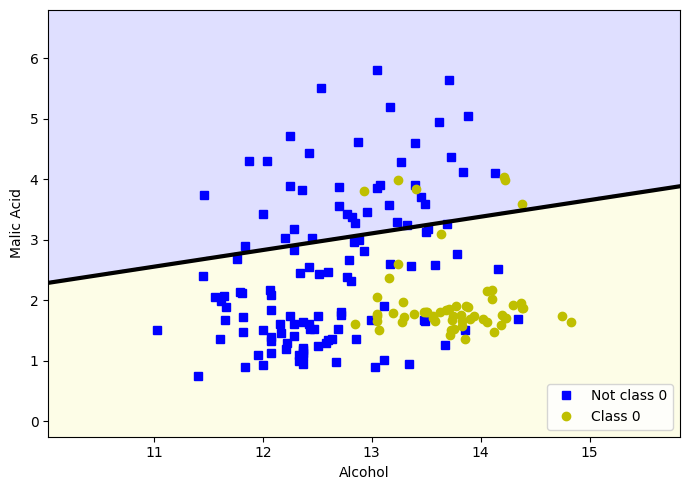

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X, y = load_wine(as_frame=True, return_X_y=True)

y_binary = (y == 0).astype(int)

X_selected = X.iloc[:, [0, 1]] 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_binary, random_state=0)

perceptron = Perceptron(random_state=0)
perceptron.fit(X_train, y_train)

accuracy = perceptron.score(X_test, y_test)
print(f'Dokładność: {accuracy:.2f}')

# Calculate the decision boundary line
a = -perceptron.coef_[0, 0] / perceptron.coef_[0, 1]
b = -perceptron.intercept_ / perceptron.coef_[0, 1]

axes = [X_selected.iloc[:, 0].min() - 1, X_selected.iloc[:, 0].max() + 1, 
        X_selected.iloc[:, 1].min() - 1, X_selected.iloc[:, 1].max() + 1]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = perceptron.predict(X_new)
zz = y_predict.reshape(x0.shape)

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# Plot the decision boundary
plt.figure(figsize=(7, 5))
plt.plot(X_selected.iloc[:, 0][y_binary == 0], X_selected.iloc[:, 1][y_binary == 0], "bs", label="Not class 0")
plt.plot(X_selected.iloc[:, 0][y_binary == 1], X_selected.iloc[:, 1][y_binary == 1], "yo", label="Class 0")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.3)

plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend(loc="lower right")
plt.axis(axes)
plt.tight_layout()
plt.show()
